<a href="https://colab.research.google.com/github/CodeWithMayank-Py/ML-Models/blob/main/anime_and_cartoon_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!python -m pip install -qq kaggle

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kanakmittal/anime-and-cartoon-image-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip -qq "anime-and-cartoon-image-classification"

In [ ]:
import tensorflow as tf
train = tf.keras.utils.image_dataset_from_directory("/content/Training Data/Cartoon",labels='inferred',label_mode='int',class_names=None,
                                                      color_mode='rgb',batch_size=32,image_size=(256,256),shuffle=True,seed=8,
                                                      validation_split=0.3,subset='training',interpolation='bilinear')
valid = tf.keras.utils.image_dataset_from_directory("/content/Training Data/Cartoon",labels='inferred',label_mode='int',class_names=None,
                                                      color_mode='rgb',batch_size=32,image_size=(256,256),shuffle=True,seed=8,
                                                      validation_split=0.3,subset='validation',interpolation='bilinear')



Found 4445 files belonging to 53 classes.
Using 3112 files for training.
Found 4445 files belonging to 53 classes.
Using 1333 files for validation.


In [ ]:
train.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

Data Augmentation

In [ ]:
random_flip=tf.keras.layers.RandomFlip('horizontal_and_vertical',
                                       name='random_flip')
random_zoom=tf.keras.layers.RandomZoom(height_factor=0.1,
                                       width_factor=0.1,
                                       name='random_zoom')
random_rotate=tf.keras.layers.RandomRotation(0.3,
                                             name='random_zoom')
random_brightness=tf.keras.layers.RandomBrightness(0.3,
                  value_range=(0.0,255.0),name='random_brightness')
augmentations= [random_flip, random_zoom, random_rotate, random_brightness]
for augmentation in augmentations:
  train= train.map(lambda images, labels: (augmentation(images),labels))


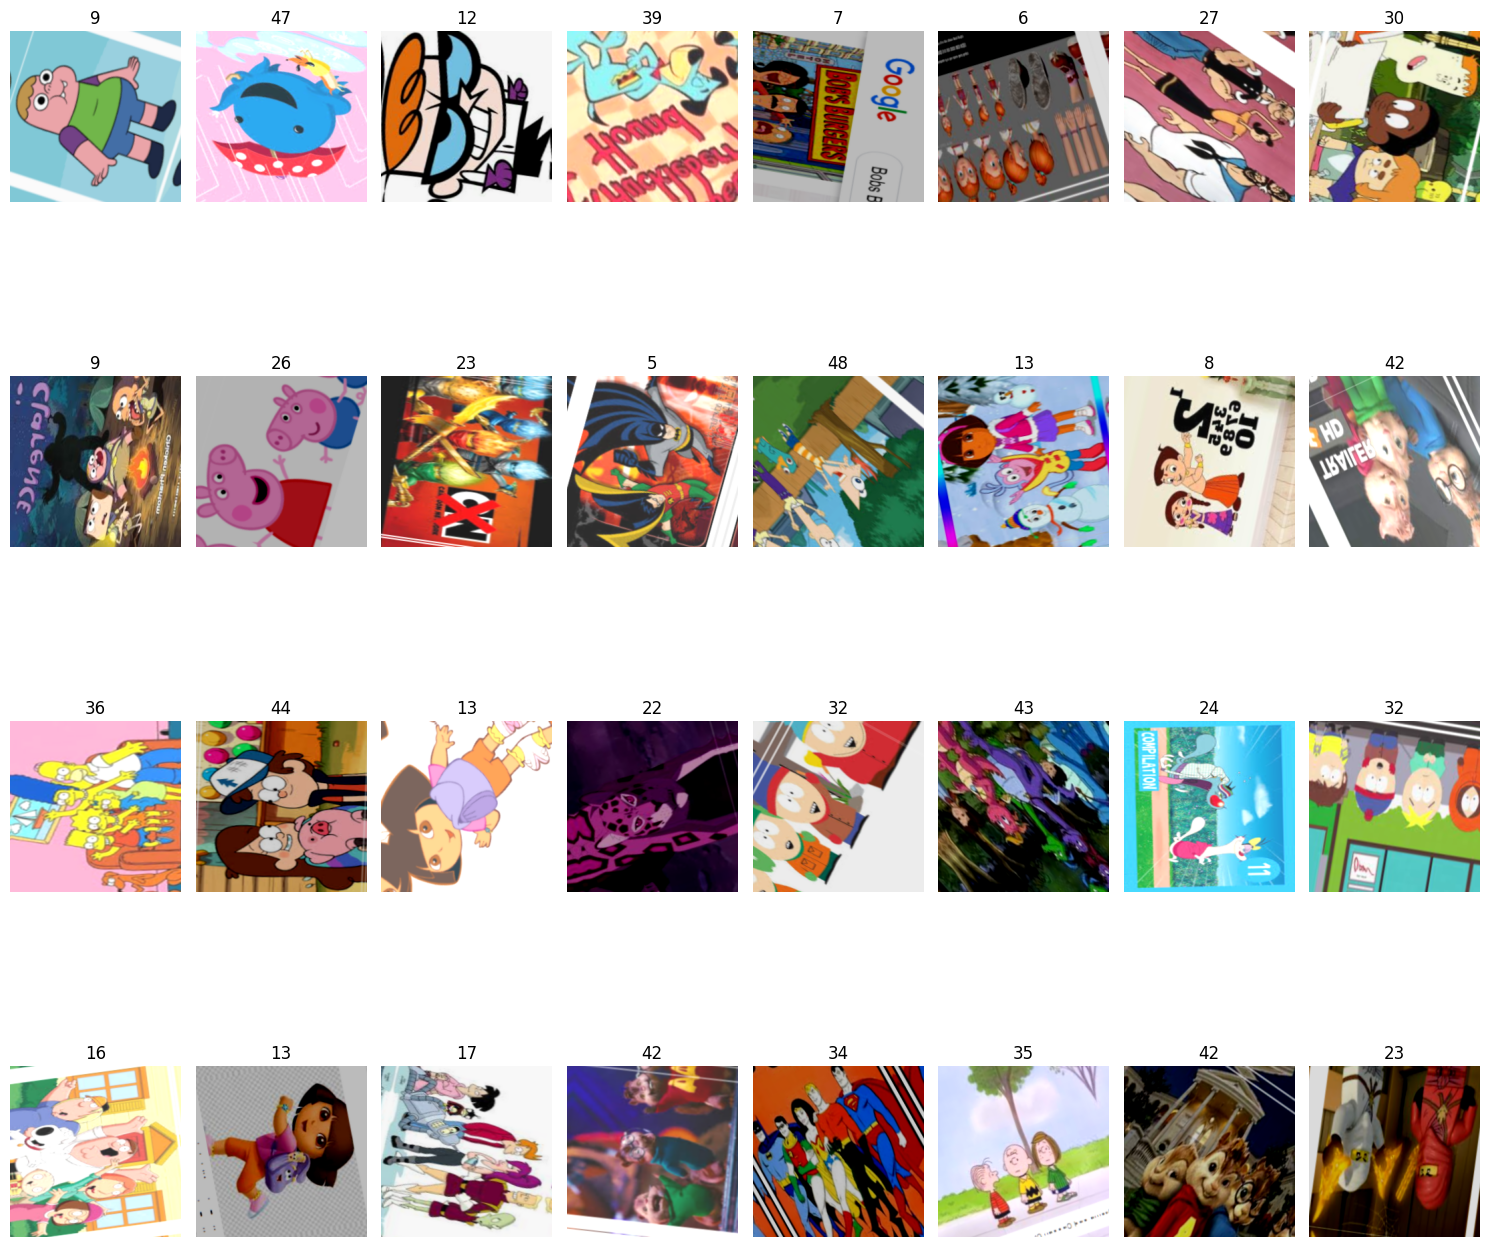

In [ ]:
from matplotlib import pyplot as plt
for images,labels in train.take(1):break
images_to_plot:int=8*4
plt.figure(figsize=(15,15))
for index in range(images_to_plot):
  plt.subplot(4,8,index+1)
  plt.imshow(images[index].numpy().astype('uint8'))
  plt.axis('off')
  plt.title(labels[index].numpy())
plt.tight_layout()
plt.show()

In [ ]:
#download data
#!wget
# unzip data
#!tar xzf "your/zip/file/address"
#make remove zip file
#!rm
# to download from any google drive . Only single file can downloaded
#!gdown "file_id "